## `Ali Almalki`

# Heart Disease Classification Project 
### Context

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

### Attribute Information

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

### Project Source: 

Kaggle Heart Disease UCI: https://www.kaggle.com/ronitf/heart-disease-uci



#### Import all required libraries for the project

In [1]:
# Libraries to deal with data
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Algorithms needed for the classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier

# Algorithms Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay



%matplotlib inline

#### Read Data

In [2]:
# Read data into a dataframe

df = pd.read_csv('https://raw.githubusercontent.com/trojrobert/Classification-of-heart-disease-uci-data-/master/heart.csv') 
df.head(10) 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


#### Exploring our data

In [3]:
# Check out data shape (rows, columns)
df.shape

(303, 14)

In [4]:
# Feature names
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
# Check out if there is null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# Check out the first five rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
# Check out the last five rows
df.tail()  

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


1    165
0    138
Name: target, dtype: int64


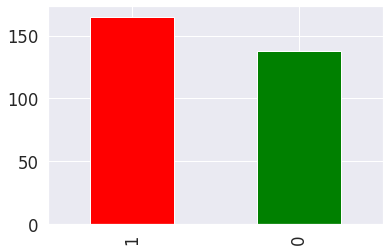

In [113]:
# How many samples in each class? (1 - has heart disease, 0 - does not have have disease)
print(df.target.value_counts())
df.target.value_counts().plot(kind='bar', color=['red', 'green']);


### Finding Patterns
Exploratory Data Analysis (EDA)

#### Heart Disease Frequency according to Sex

In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# Compare target column with sex target column 
# (0 - female, 1 - male) - (0 - no heart disease, 1 - have disease)
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


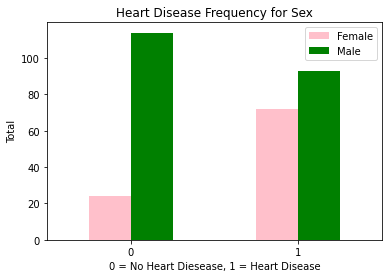

In [13]:
# Visualise crosstab of target and sex columns
pd.crosstab(df.target, df.sex).plot(kind='bar', color=['pink', 'green']);

plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Heart Diesease, 1 = Heart Disease')
plt.ylabel('Total')
plt.legend(['Female', 'Male']);
plt.xticks(rotation=0);

In [14]:
df['thalach'].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

#### Age and Maximum Heart Rate for Heart Disease

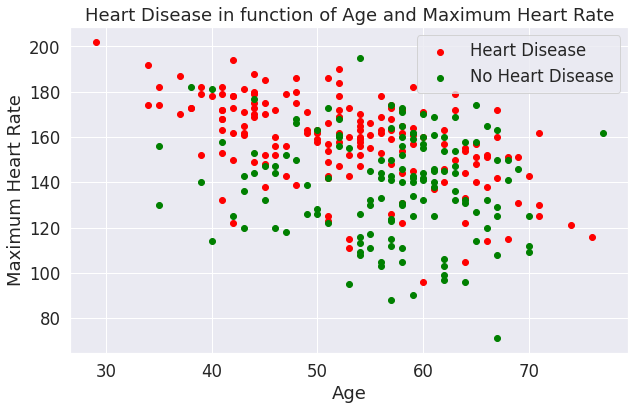

In [ ]:
# Create figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="red")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="green")

# Add some helpful info
plt.title('Heart Disease in function of Age and Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.legend(['Heart Disease', 'No Heart Disease']);

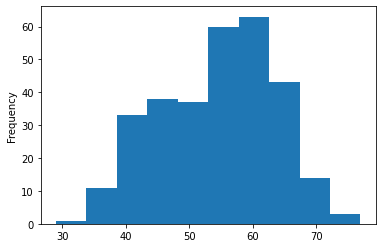

In [15]:
# Check out the distribution of the age column 
df.age.plot.hist();

#### Heart Disease Frequency per Chest Pain Type¶
cp - chest pain type
- 0: Typical angina: chest pain related decrease blood supply to the heart
- 1: Atypical angina: chest pain not related to heart
- 2: Non-anginal pain: typically esophageal spasms (non heart related)
- 3: Asymptomatic: chest pain not showing signs of disease

In [16]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


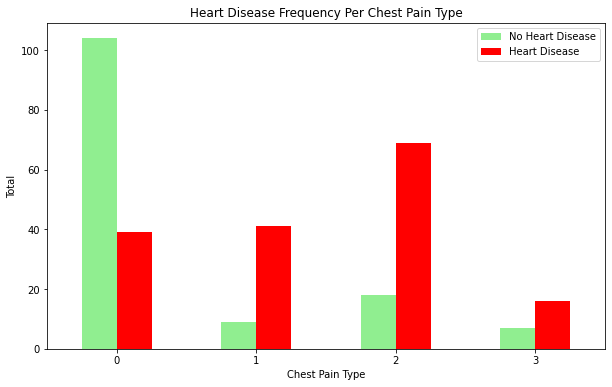

In [17]:
# Plot crosstab data
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=(10, 6),
                                   color=['lightgreen', 'red'])

# Add figure information
plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Total')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.xticks(rotation=0);

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# Let's check the correlation matrix of the data 
df.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

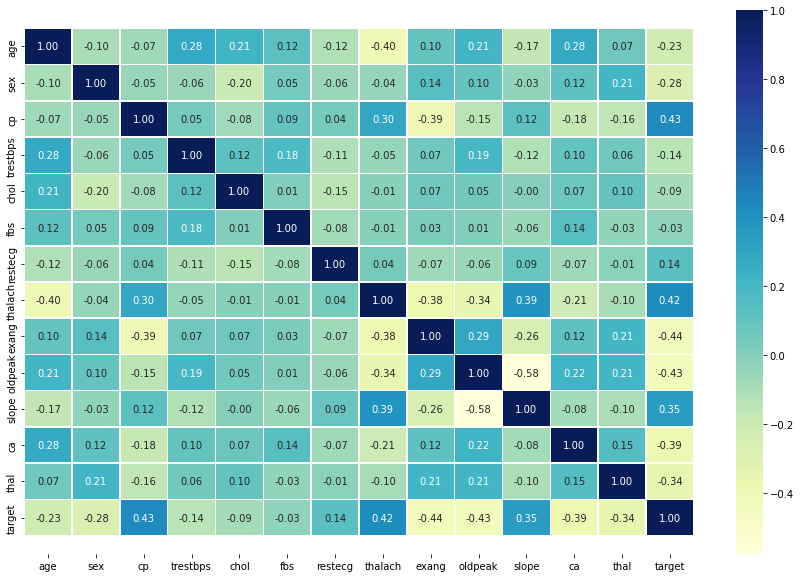

In [23]:
# Let's plot the correlation matrix on heat map
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu');
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Modelling Part 
Here we want to build classification models that are able to predict 
whether or not a patient has heart disease


In [24]:
# Check our dataframe again 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
# Split data into X and y variables
X = df.drop('target', axis=1)

y = df['target']

In [26]:
X.shape, y.shape

((303, 13), (303,))

In [27]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [28]:
# Check X and y
print(X)
print(y)

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0     63    1   3       145   233  ...      0      2.3      0   0     1
1     37    1   2       130   250  ...      0      3.5      0   0     2
2     41    0   1       130   204  ...      0      1.4      2   0     2
3     56    1   1       120   236  ...      0      0.8      2   0     2
4     57    0   0       120   354  ...      1      0.6      2   0     2
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
298   57    0   0       140   241  ...      1      0.2      1   0     3
299   45    1   3       110   264  ...      0      1.2      1   0     3
300   68    1   0       144   193  ...      0      3.4      1   2     3
301   57    1   0       130   131  ...      1      1.2      1   1     3
302   57    0   1       130   236  ...      0      0.0      1   1     2

[303 rows x 13 columns]
0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target

In [29]:
# Split data into train and test sets
xtrain, xtest, ytrain, ytest = train_test_split(X, 
                                                y, 
                                                test_size=0.2,
                                                random_state=2)

In [30]:
# Check sets shape
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((242, 13), (61, 13), (242,), (61,))

In [31]:
xtrain

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
77,59,1,1,140,221,0,1,164,1,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2


In [32]:
ytrain

237    0
106    1
10     1
153    1
77     1
      ..
75     1
22     1
72     1
15     1
168    0
Name: target, Length: 242, dtype: int64

In [33]:
xtest

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2
216,62,0,2,130,263,0,1,97,0,1.2,1,1,3


In [34]:
ytest

99     1
296    0
89     1
30     1
234    0
      ..
173    0
94     1
161    1
216    0
91     1
Name: target, Length: 61, dtype: int64

#### Training Classification Machine Learning Models

I'm going to try the following classification models:

- Logistic Regression
- K-Nearest Neighbours Classifier
- Random Forest Classifier
- Gaussian Process Classifier
- Gaussian Naive Bayes Classifier
- Decision Tree Classifier

### Baseline Models

In [39]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [40]:
# Put all models in a single dictionary
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier(),
          'Gaussian Process': GaussianProcessClassifier(),
          'GaussianNB': GaussianNB(), 
          'Decision Tree': DecisionTreeClassifier(), 
          'Support Vector Machines': SVC(),
          'Random Forest': RandomForestClassifier(),
          'Ada Boost': AdaBoostClassifier()}


#### A function to train and evaluate models

In [41]:
# Create a function to fit and score models
def fit_and_score(models, xtrain, xtest, ytrain, ytest):
    """
    This function fits and evaluates given machine learning models.
    models : a dict of differet Scikit-Learn machine learning models.
    xtrain : training data (no labels)
    xtest : testing data (no labels)
    ytrain : training labels
    ytest : test labels
    """
    # Set random seed 
    np.random.seed(2)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the training data
        model.fit(xtrain, ytrain)
        # Evaluate the model and append its score to model_scores dictionary
        model_scores[name] = model.score(xtest, ytest)
        
    # Return the model scores
    return model_scores

#### Train and Evaluate Models

In [42]:
model_scores = fit_and_score(models=models,
                             xtrain=xtrain,
                             ytrain=ytrain,
                             xtest=xtest,
                             ytest=ytest)

model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'Ada Boost': 0.8852459016393442,
 'Decision Tree': 0.8360655737704918,
 'Gaussian Process': 0.6065573770491803,
 'GaussianNB': 0.8852459016393442,
 'KNN': 0.7049180327868853,
 'Logistic Regression': 0.9016393442622951,
 'Random Forest': 0.9016393442622951,
 'Support Vector Machines': 0.6721311475409836}

#### Evaluate Models Performance


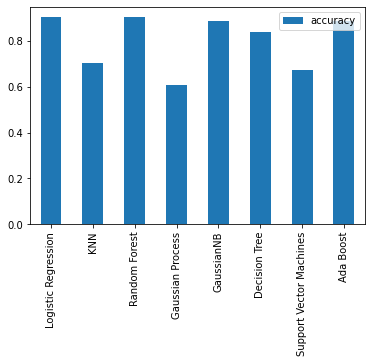

In [43]:
# Compare accuracy score of all classification models
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

### Experimenting Part

### Improving baseline models performance

- Hypyterparameter tuning
- Feature importance
- Confusion matrix
- Cross-validation
- Precision
- Recall
- F1 score
- Classification report
- ROC curve
- Area under the curve (AUC)

#### Hypyterparameter Tuning - KNN Classifier 

##### Tuning number of neighbours hyperparameter 

In [44]:
train_scores = []
test_scores = []

In [45]:
# Create a list of differnt values for n_neighbors hyperparameter
neighbors = range(1, 21)


In [46]:
# Instantiate KNN Classifier
knn = KNeighborsClassifier() # n_neighbors : int, default=5

In [47]:
# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(xtrain, ytrain)
    
    # Update the training scores list
    train_scores.append(knn.score(xtrain, ytrain))
    
    # Update the test scores list
    test_scores.append(knn.score(xtest, ytest))

In [48]:
len(train_scores), len(test_scores)

(20, 20)

In [49]:
# Check the 20 training and testing scores
print(train_scores)
print(test_scores)

[1.0, 0.7892561983471075, 0.7396694214876033, 0.7355371900826446, 0.7396694214876033, 0.7396694214876033, 0.7231404958677686, 0.7107438016528925, 0.7066115702479339, 0.6900826446280992, 0.7107438016528925, 0.6983471074380165, 0.7066115702479339, 0.7024793388429752, 0.6859504132231405, 0.6735537190082644, 0.6900826446280992, 0.6735537190082644, 0.6818181818181818, 0.6735537190082644]
[0.6065573770491803, 0.639344262295082, 0.7213114754098361, 0.7213114754098361, 0.7049180327868853, 0.7049180327868853, 0.7377049180327869, 0.7377049180327869, 0.6885245901639344, 0.7213114754098361, 0.6557377049180327, 0.6557377049180327, 0.6557377049180327, 0.6885245901639344, 0.7049180327868853, 0.6885245901639344, 0.7213114754098361, 0.7540983606557377, 0.7540983606557377, 0.7704918032786885]


Maximum KNN classifier score on the test set: 77.05%


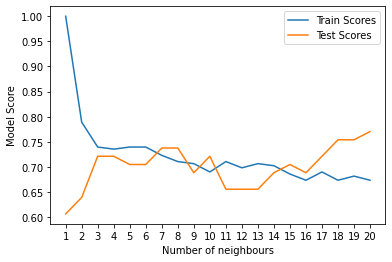

In [50]:
# Visualise the scores 
plt.plot(neighbors, train_scores, label='Train Scores')
plt.plot(neighbors, test_scores, label='Test Scores')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of neighbours')
plt.ylabel('Model Score')
plt.legend()

print(f"Maximum KNN classifier score on the test set: {max(test_scores)*100:.2f}%")

From the figure above, we can see that 20 neigbours is the best number to yield the better result (77.05%) for the KNN classifier. 
However, even after the hyperparameter tuning aka improving KNN classifier it is still far below the other classifiers scores and because of this I'm going to discard KNN and try to improve other classifiers.

#### Hyperparameter Tuning - Logistic Regression Classifier


In [51]:
# Create a hyperparameter grid for Logistic Regression Classifier
lr_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

Tuning the following hyperparameters:
- n_estimators
- max_depth
- min_samples_split
- min_samples_leaf

In [52]:
# Create a hyperparameter grid for Random Forest Classifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50), # default=100
           'max_depth': [None, 3, 5, 10], # default=None
           'min_samples_split': np.arange(2, 20, 2), # default=2
           'min_samples_leaf': np.arange(1, 20, 2)} # default=1

#### Base Results to try to improve
 -  Logistic Regression : 0.9016393442622951
 -  Random Forest: 0.9016393442622951
 - GaussianNB: 0.8852459016393442

#### Tunning Logistic Regression Classifier

In [53]:
# Set a random seed for reproducibility
np.random.seed(42)

# create random hyperparameter search for Logistic Regression
rs_lr = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=lr_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit the model to the training set
rs_lr.fit(xtrain, ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [58]:
# Evaluate tuned Logistic Regression on the test set
rs_lr.score(xtest, ytest)

0.9180327868852459

#### As we can see that Logistic Regression performance has improved from 0.901 to 0.918  after hyper tunning it which is good!

In [56]:
# Check out the best parameters values
rs_lr.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

#### Tunning Random Forest Classifier

In [57]:
# Set a random seed for reproducibility
np.random.seed(42)

# Create random hyperparameter search for Random Forest Classifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=100,
                           verbose=True)

# Fit the model to the training set
rs_rf.fit(xtrain, ytrain)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [59]:
# Evaluate tuned Random Forest Classifier on the test set
rs_rf.score(xtest, ytest)

0.8688524590163934

In [60]:
# Check out the best parameters values
rs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 7,
 'min_samples_split': 12,
 'n_estimators': 110}

As we can see that Random Forest performance got worse after tunning its hyperparameters. 
- Baseline result: 0.901 
- Tuned result:  0.868

#### Hyperparamter Tuning with GridSearchCV - Logistic Regression Classifier
So far with the experiments Logistic Regression Classifier model performs the best amongst other classifiers. Therefore, I'll try and improve them again using another technique which is GridSearchCV.

In [61]:
# Different hyperparameters for our Logistic Regression Classifier
lr_grid = {'C': np.logspace(-4, 4, 30),
                'solver': ['liblinear']}

In [62]:
# Setup grid hyperparameter search for LogisticRegression
gs_lr = GridSearchCV(LogisticRegression(),
                          param_grid=lr_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_lr.fit(xtrain, ytrain);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [63]:
# Evaluate the grid search Logistic Regression Classifier
gs_lr.score(xtest, ytest)

0.9180327868852459

In [ ]:
# Check out the best parameters values
rs_lr.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

#### Hyperparamter Tuning with GridSearchCV - Gaussian Naive Bayes Classifier
Let's tune GaussianNB classifier and see if it could beat Logistic Regression performance score.

- GaussianNB Baseline Score: 0.8852459016393442

I'll try to improve this result by tunning some hyperparameters.

In [82]:
# Set hyperparameter values for our GaussianNB Classifier
GaussianNB_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [83]:
# Setup grid hyperparameter search for GaussianNB
gs_GaussianNB = GridSearchCV(GaussianNB(),
                          param_grid=GaussianNB_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_GaussianNB.fit(xtrain, ytrain);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [84]:
# Evaluate the grid search GaussianNB
gs_GaussianNB.score(xtest, ytest)

0.9180327868852459

In [85]:
# Check out the best parameters values
gs_GaussianNB.best_params_

{'var_smoothing': 2.848035868435799e-05}

#### Wow!! That was a nice improvement to our GaussianNB classifier. 
- GaussianNB Baseline Model Result: 0.8852459016393442 🤷🏻
- GaussianNB Tuned Model Result: 0.9180327868852459 🕺🏻

#### Evaluting Tuned ML classifiers with the following:

- Confusion matrix
- Classification report
- ROC curve and AUC score
- Precision
- Recall
- F1-score




In [86]:
# Make predictions with LR tuned model
ypred = gs_lr.predict(xtest)
ypred

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1])

In [87]:
ytest

99     1
296    0
89     1
30     1
234    0
      ..
173    0
94     1
161    1
216    0
91     1
Name: target, Length: 61, dtype: int64

In [88]:
# Check out predictions with ground truth labels
pd.DataFrame(ypred == ytest)

,target
99,True
296,False
89,True
30,True
234,True
...,...
173,True
94,True
161,True
216,True


#### Plot ROC curve and calculate AUC metric

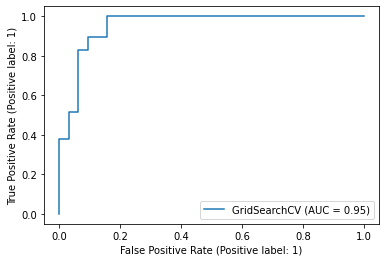

In [89]:
# Create a ROC Curve display from our Logistic Regression Classifier
RocCurveDisplay.from_estimator(gs_lr, xtest, ytest);

#### Confusion Matrix

In [90]:
print(confusion_matrix(ytest, ypred))

[[27  5]
 [ 0 29]]


In [91]:
sns.set(font_scale=1.5)

def display_confusion_matrix(ytest, ypred):
    """
    This function plots a confusion matrix using Seaborn's heatmap() function.
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(ytest, ypred),
                     annot=True,
                     cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('Ground Truth Label')
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)



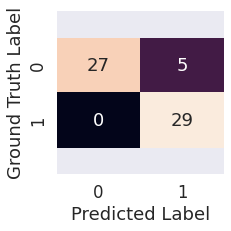

In [92]:
# Plot confusion matrix
display_confusion_matrix(ytest, ypred)

#### Classification Report

In [93]:
print(classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92        27
           1       1.00      0.85      0.92        34

    accuracy                           0.92        61
   macro avg       0.92      0.93      0.92        61
weighted avg       0.93      0.92      0.92        61



#### Calculate evaluation metrics using cross-validation

In [94]:
# Check out the best parameters values
gs_lr.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [95]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.1082636733874054,
                         solver='liblinear')

In [96]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [97]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [98]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.834808743169399

In [99]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='precision')

cv_precision=np.mean(cv_precision)
cv_precision

0.8182683982683983

In [100]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='recall')

cv_recall=np.mean(cv_recall)
cv_recall

0.9030303030303031

In [101]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='f1')

cv_f1=np.mean(cv_f1)
cv_f1

0.8572876223964057

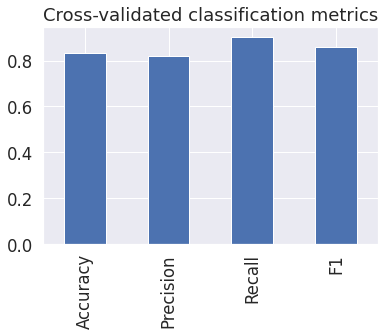

In [102]:
# Visualise cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'Precision': cv_precision,
                           'Recall': cv_recall,
                           'F1': cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title='Cross-validated classification metrics',
                      legend=False);

#### Feature Importance - Logistic Regression Classifier


In [103]:
# Instantiate Logistic Regression Classifier and fit it to the training set
clf = LogisticRegression(C=0.1082636733874054,
                         solver='liblinear')

clf.fit(xtrain, ytrain);

In [104]:
# Check coef_
clf.coef_

array([[ 0.00647008, -0.68304127,  0.6184325 , -0.01307299, -0.00299729,
        -0.01771121,  0.24452429,  0.0243036 , -0.38642002, -0.39287514,
         0.32969957, -0.51228764, -0.48958063]])

In [106]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [105]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0064700829325063484,
 'ca': -0.5122876369315944,
 'chol': -0.002997289620816121,
 'cp': 0.6184325001296853,
 'exang': -0.3864200209029064,
 'fbs': -0.01771120878786709,
 'oldpeak': -0.3928751408901576,
 'restecg': 0.24452428721064673,
 'sex': -0.6830412748635577,
 'slope': 0.3296995665707316,
 'thal': -0.489580631268462,
 'thalach': 0.024303596853501485,
 'trestbps': -0.013072986762593691}

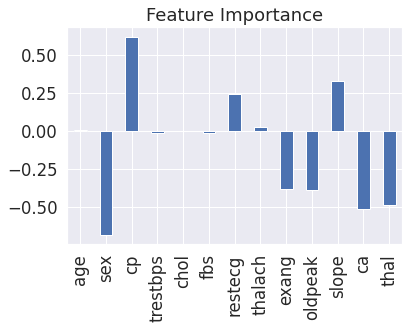

In [107]:
# Visualise feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False);

In [108]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [109]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


### References: 
- Cross Tabulation: https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
- Logistic Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- K-Nearest Neighbours Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- Random Forest Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- Hyperparameter tuning for machine learning models: https://www.jeremyjordan.me/hyperparameter-tuning/
- GridSearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- Feature Importance for Logistic Regression: https://towardsdatascience.com/a-look-into-feature-importance-in-logistic-regression-models-a4aa970f9b0f
- GaussianNB Tuning: https://medium.com/analytics-vidhya/how-to-improve-naive-bayes-9fa698e14cba
